# 1. Importing necessary libraries

In [1]:
#basic libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the dataset

In [27]:
df = pd.read_csv("./heart_disease_uci.csv", index_col = 'id')

# 3. Find out Data Types and Column Types

In [215]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


# 4. Data Cleaning

In [35]:
dataMissingValues = []
values_col = []
print('Total Rows: {}'.format(len(df)))
for col in df.columns:
	if (len(df[col].unique()) > 10): values_col = '{} {}'.format(len(df[col].unique()), 'values')
	else: values_col = df[col].unique()
	dataMissingValues.append({ 
		'Column Name': col,
		'Missing values': df[col].isnull().sum(),
		'Unique Values': values_col
	})
pd.set_option('display.max_colwidth', 0)
pd.DataFrame(dataMissingValues)

Total Rows: 775


,Column Name,Missing values,Unique Values
0,age,0,50 values
1,sex,0,"[Male, Female]"
2,dataset,0,"[Cleveland, Hungary, Switzerland, VA Long Beach]"
3,cp,0,"[typical angina, asymptomatic, non-anginal, atypical angina]"
4,trestbps,0,58 values
5,chol,0,208 values
6,fbs,0,"[True, False]"
7,restecg,0,"[lv hypertrophy, normal, st-t abnormality, Don't know]"
8,thalch,0,115 values
9,exang,0,"[False, True]"


## Checking data characters mistakes

In [7]:
df['restecg'].replace(['st-t abnormality'], 'stt abnormality', inplace = True)
df['thal'].replace(['reversable defect'], 'reversible defect', inplace = True)

## Checking for missing values and replace them

Replacing numeric values for median values

In [31]:
for col in ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']:
	median = df[col].median()
	df[col].fillna(median, inplace=True)

Replacing some categorical values with the text 'Don\'t know'

In [32]:
for col in ['restecg', 'slope', 'thal']:
	df[col].fillna('Don\'t know', inplace=True)

Removing missing values when data can not be replaced

In [34]:
df = df.dropna(subset=['fbs', 'exang'])

## Checking for duplicate rows

In [104]:
df['id'] = 406

In [105]:
df[df.duplicated()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,id
id,,,,,,,,,,,,,,,,


## Statistics Summary

In [106]:
# Summary Statistics for Numerical data:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num,id
count,372.000000,372.000000,372.000000,372.000000,372.000000,299.000000,372.000000,372.0
mean,54.774194,132.131720,214.889785,143.556452,1.015054,0.672241,1.088710,406.0
std,9.030800,17.906958,97.522635,26.099014,1.116955,0.937438,1.243931,0.0
min,29.000000,94.000000,0.000000,60.000000,-1.000000,0.000000,0.000000,406.0
25%,48.000000,120.000000,197.000000,125.000000,0.000000,0.000000,0.000000,406.0
50%,56.000000,130.000000,233.000000,146.500000,0.800000,0.000000,1.000000,406.0
75%,61.000000,140.000000,270.250000,163.000000,1.600000,1.000000,2.000000,406.0
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000,406.0


In [107]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,372,372,372,372,372,372,372,372
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,269,301,199,320,195,225,193,182


In [108]:
df.isnull().sum() 

age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak      0
slope        0
ca          73
thal         0
num          0
id           0
dtype: int64

## Outliers and how to remove them

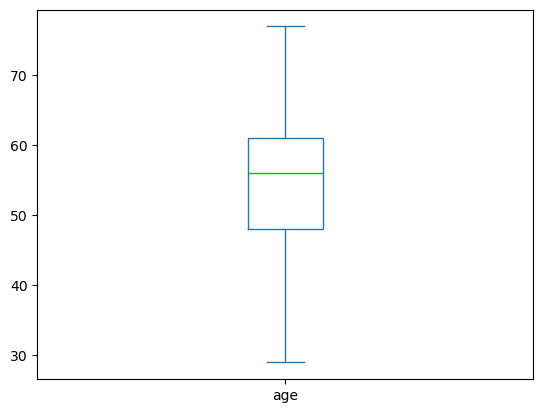

In [109]:
df['age'].plot(kind='box')
plt.show()

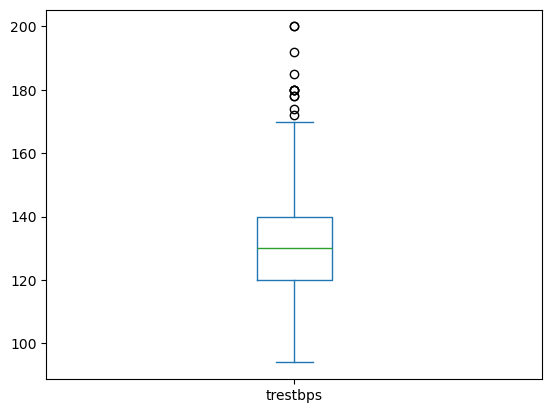

In [110]:
df['trestbps'].plot(kind='box')
plt.show()

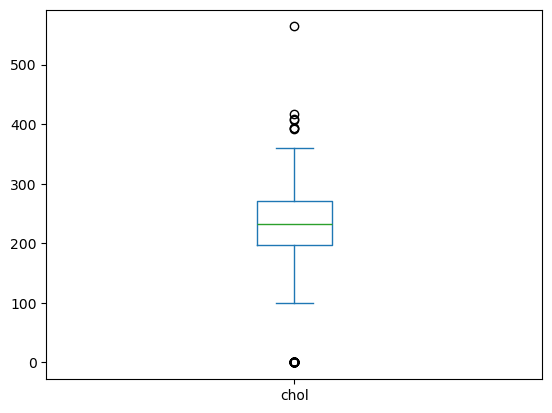

In [111]:
df['chol'].plot(kind='box')
plt.show()

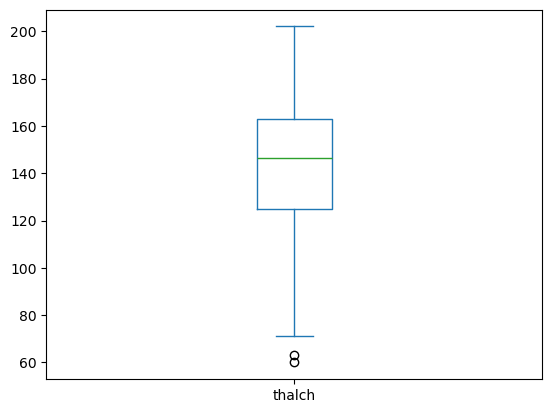

In [112]:
df['thalch'].plot(kind='box')
plt.show()

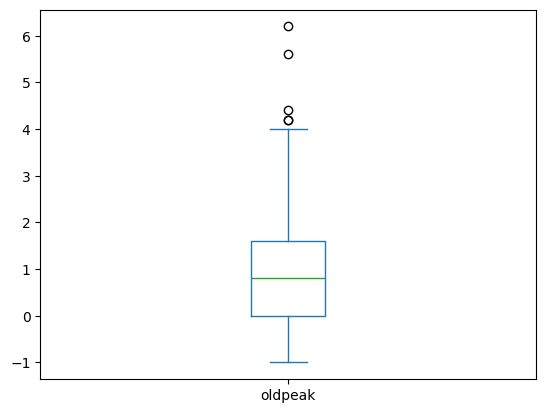

In [113]:
df['oldpeak'].plot(kind='box')
plt.show()

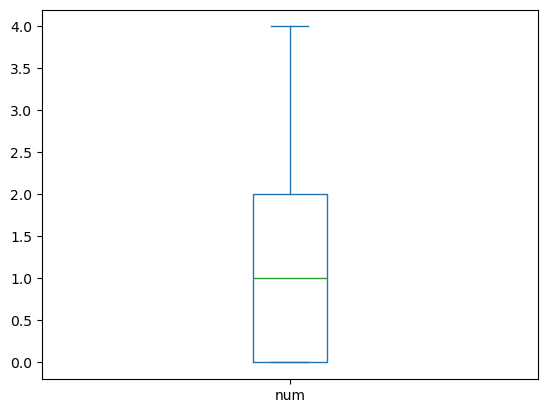

In [114]:
df['num'].plot(kind='box')
plt.show()

# 5. Distributions and Relationships

## Categorical Variable Distribution

## Relationship between categorical and continues variables

# 6. Data Anslysis and Visualization

## Age variable distribution

## Gender distribution accoding to target variable

## Chest pain distribution according to target variables

## Draw correlation using Pearson's Heat-map

In [115]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

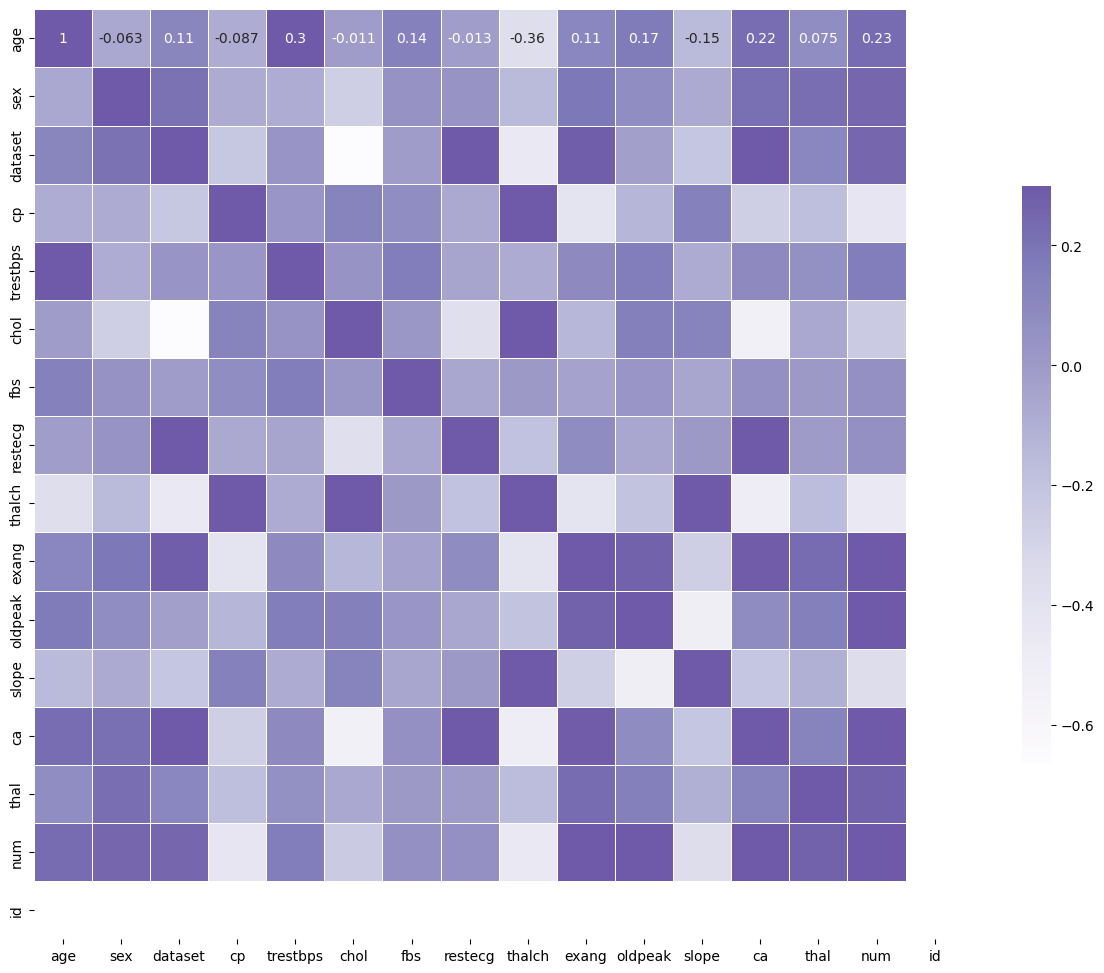

In [116]:
# Compute the correlation matrix
corr = df.corr()

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_33399/3980166100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], ax=axes[0,0])
/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_33399/3980166100.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot`

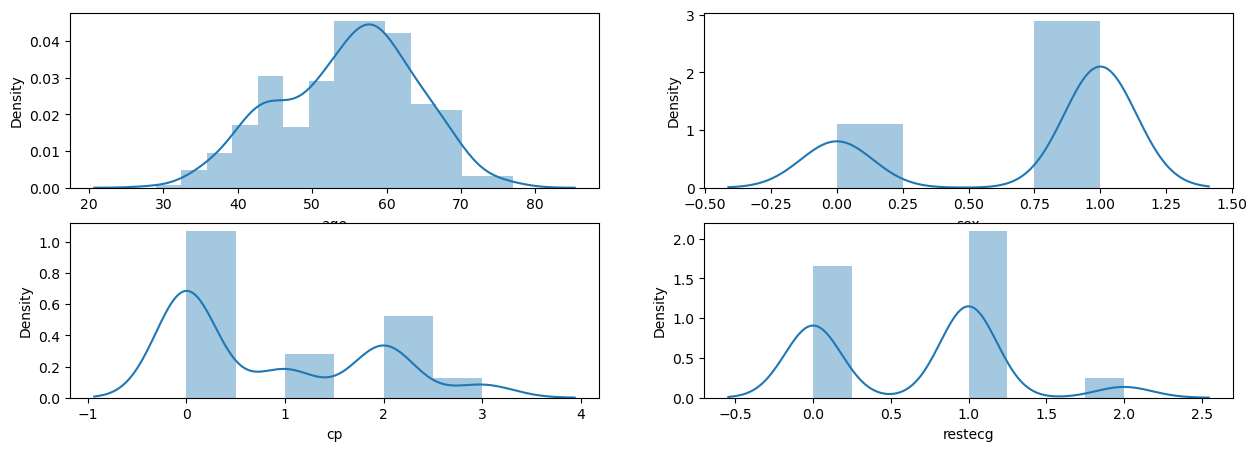

In [117]:
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['sex'], ax=axes[0,1])
sns.distplot(df['cp'], ax=axes[1,0])
sns.distplot(df['restecg'], ax=axes[1,1])


plt.show()

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_33399/3469822856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ca'], ax=axes[0,0])
/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: 'slop'

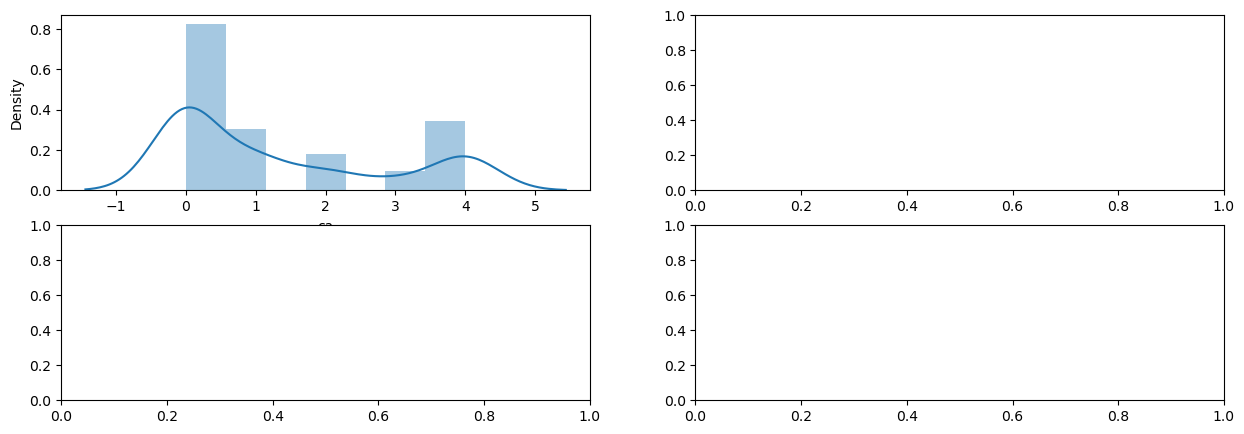

In [118]:
# Categorical variable distributions

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df['ca'], ax=axes[0,0])
sns.distplot(df['slop'], ax=axes[0,1])
sns.distplot(df['fbs'], ax=axes[1,0])
sns.distplot(df['restecg'], ax=axes[1,1])


plt.show()

# 7. Conclusions

1) Which ML model you would choose for this taks?

- I would choose linear regression because the model prediction depend of multiple features data 

2) Write the equation for that model

- x = m*b

3) Explain the equation written in the previous question and explain all the terms in the dataset (Independent, Dependent, Features, Weights)

- The dependent variable is m it is the slope, the b is the linear value and x is the value of x axis